# Interpolation module

The Midgard **math.spatial_interpolation** module provides functionality to carry out one dimensional (1D) interpolation. (https://docs.scipy.org/doc/scipy/tutorial/interpolate/ND_unstructured.html#d-example)

## Use interpolation module

An example is shown, how to use the `math.interpolation` module, which includes several interpolation method. The interpolation methods are based on **SciPy** functions, except for `lagrange` interpolation method.

In [1]:
# Import interpolation module
from midgard.math import interpolation

# Define plotting function, which is used later
def plot(x, y, x_new, y_new, y_truth=None, ylim=None):
    plt.plot(x, y, label="data", linestyle="None", color="blue", marker="o", markersize=4)
    plt.plot(x_new, y_new, label="interpolated", color="green")
    if np.any(y_truth):
        plt.plot(x_new, y_truth, label="truth", linewidth=3.0, color="black", alpha=0.2)
        plt.title(f"RMS of (truth - interpolated): {np.sqrt(np.nanmean(np.square(y_truth - y_new))):.4f}")
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    
    plt.legend()

# Write list with available interpolators
interpolation.interpolators()

['barycentric_interpolator',
 'cubic',
 'interpolated_univariate_spline',
 'lagrange',
 'linear',
 'nearest']

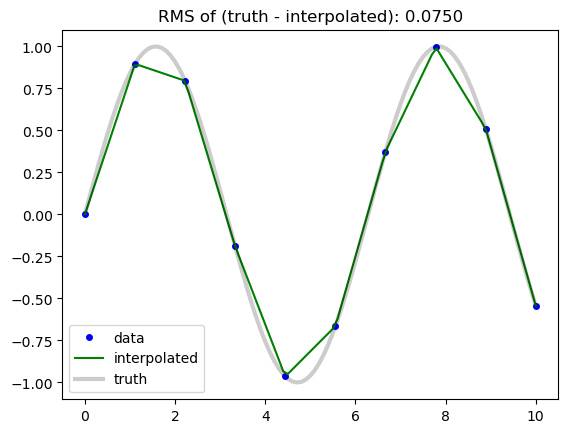

In [2]:
# Third party import
import numpy as np

# Import matplotlib module
import matplotlib.pyplot as plt

# Generate input data for interpolation, whereby x and y represent the original data and x_new the data points 
# for interpolation
x = np.linspace(0, 10, 10)  
y = np.sin(x)
x_new = np.linspace(0, 10, 101)

# Interpolation for given x_new data points and chosen kind of interpolation method
y_new = interpolation.interpolate(x, y, x_new, kind="linear")

# Plot interpolation results
plot(x, y, x_new, y_new, y_truth=np.sin(x_new))

In [3]:
# Determine the execution time of interpolation method with %timeit
#
# Note: %timeit is a IPython function and can be used to determine the excecution time of statement or expression,
#       whereby 
#          -n: number of loops
#          -r: number of repeats
#
%timeit -n 10 -r 1 y_new = interpolation.interpolate(x, y, x_new, kind="linear")

184 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In the following example water level data based on GNSS-Interferometric Reflectometry (GNSSS-IR) are used for interpolation for station ANDE (Andenes).

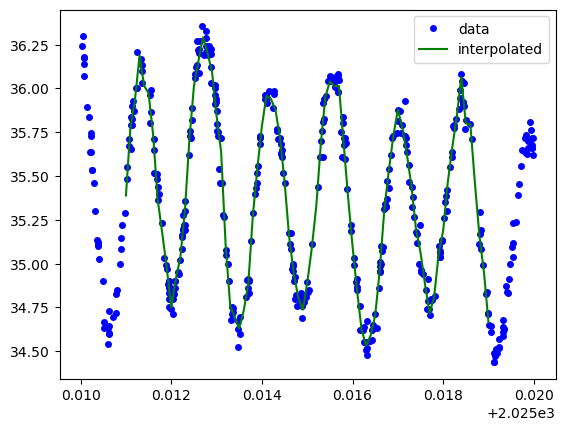

In [6]:
# Third party imports
import pandas as pd

# Import Midgard Time module
from midgard.data.time import Time

# Read GNSS-IR data from CSV file and convert time entries to datetime and decimalyear
df_csv = pd.read_csv("../examples/math/gnssrefl_subdaily_ande.csv")
df = df_csv.copy()

# Convert GPS to UTC time scale 
df["date"] = pd.to_datetime(df_csv["date"])
time = Time(
           val=df["date"],
           scale="gps",
           fmt="datetime",
)
df["date"] = time.utc.datetime
df["decimalyear"] = time.utc.decimalyear

# Merge duplicated time entries together
df_merged = df.groupby("decimalyear")["reflector_height_referenced"].mean().reset_index() 

# Define time range of interpolation
date_from = 2025.01
date_to = 2025.02
idx = np.logical_and(df_merged.decimalyear >= date_from, df_merged.decimalyear <= date_to)
df_merged = df_merged[idx]

# Generate input data for interpolation, whereby x and y represent the original data and x_new the data points 
# for interpolation
x = df_merged.decimalyear
y = df_merged.reflector_height_referenced
x_new = np.arange(date_from + 0.001 , date_to - 0.001, 0.0001)

# Interpolation for given x_new data points and chosen kind of interpolation method
y_new = interpolation.interpolate(x, y, x_new, kind="linear")

plot(x, y, x_new, y_new)